Sample COVID-19 CSV created → covid_data_sample.csv

--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          60 non-null     datetime64[ns]
 1   country       60 non-null     object        
 2   new_cases     60 non-null     int64         
 3   new_deaths    60 non-null     int64         
 4   total_cases   60 non-null     int64         
 5   total_deaths  60 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.9+ KB
None

--- FIRST 5 ROWS ---
        date country  new_cases  new_deaths  total_cases  total_deaths
0 2020-01-01   India         10           1         1000            50
1 2020-01-02   India         15           1         1050            52
2 2020-01-03   India         20           1         1100            54
3 2020-01-04   India         25           2   

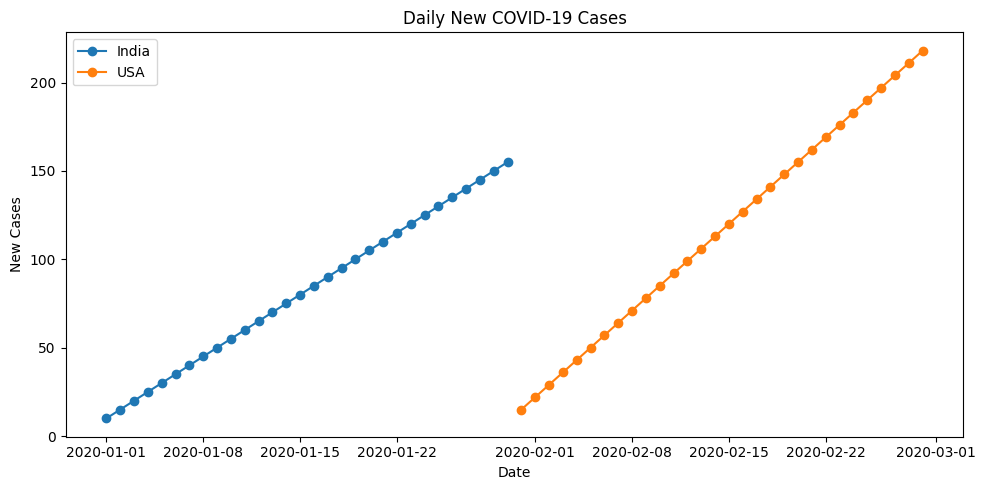

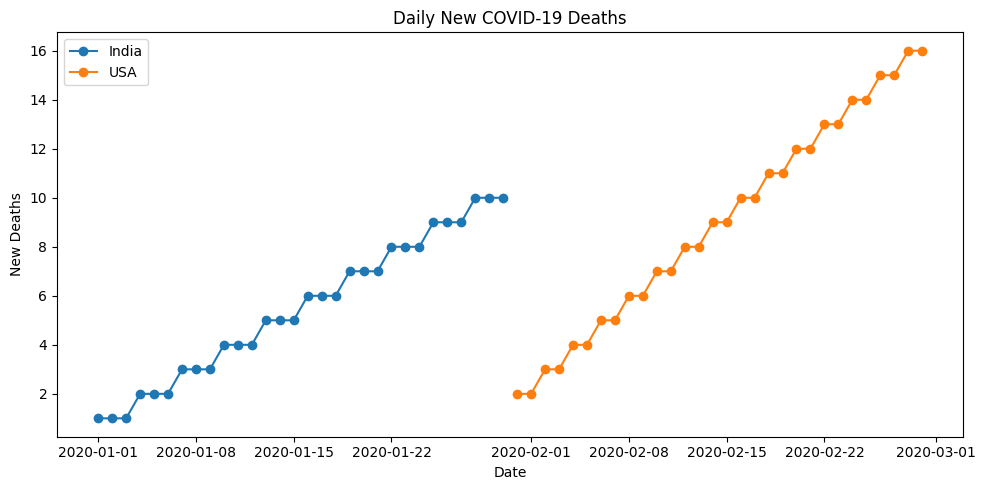

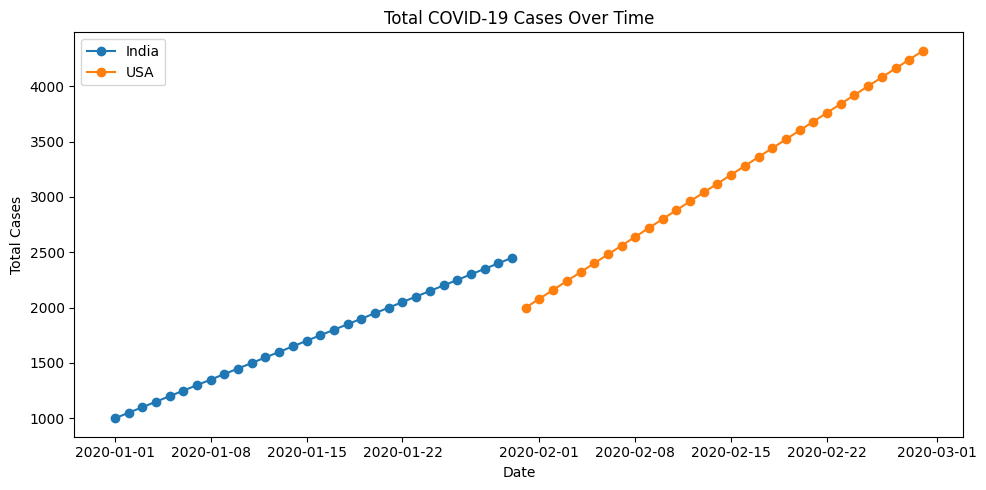

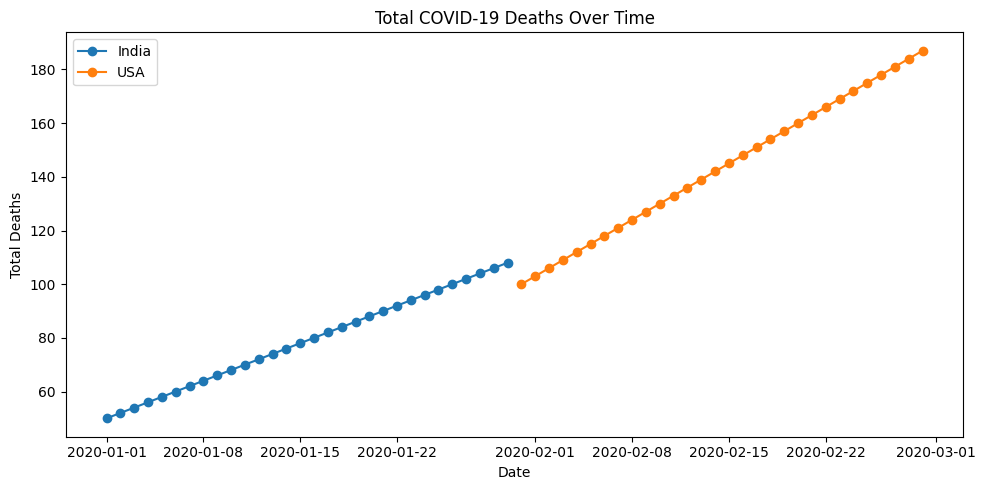

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

CSV_PATH = "covid_data_sample.csv"

def create_sample_csv(path):
    start = datetime(2020, 1, 1)
    days = 60

    data = {
        "date": [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range(days)],
        "country": ["India"] * 30 + ["USA"] * 30,
        "new_cases": [i*5 + 10 for i in range(30)] + [i*7 + 15 for i in range(30)],
        "new_deaths": [i//3 + 1 for i in range(30)] + [i//2 + 2 for i in range(30)],
        "total_cases": [1000 + i*50 for i in range(30)] + [2000 + i*80 for i in range(30)],
        "total_deaths": [50 + i*2 for i in range(30)] + [100 + i*3 for i in range(30)],
    }

    df = pd.DataFrame(data)
    df.to_csv(path, index=False)
    print(f"Sample COVID-19 CSV created → {path}")

def load_data(path):
    if not os.path.exists(path):
        create_sample_csv(path)
    df = pd.read_csv(path, parse_dates=["date"])
    return df


df = load_data(CSV_PATH)

print("\n--- BASIC INFO ---")
print(df.info())

print("\n--- FIRST 5 ROWS ---")
print(df.head())

print("\n--- SUMMARY ---")
print(df.describe())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

summary = df.groupby("country")[["new_cases", "new_deaths", "total_cases", "total_deaths"]].mean().round(2)
print("\n--- COUNTRY-WISE SUMMARY ---")
print(summary)

summary.to_csv("covid_summary.csv")
print("Summary saved → covid_summary.csv")

plt.figure(figsize=(10, 5))
for c, g in df.groupby("country"):
    plt.plot(g["date"], g["new_cases"], marker='o', label=c)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for c, g in df.groupby("country"):
    plt.plot(g["date"], g["new_deaths"], marker='o', label=c)

plt.title("Daily New COVID-19 Deaths")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for c, g in df.groupby("country"):
    plt.plot(g["date"], g["total_cases"], marker='o', label=c)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for c, g in df.groupby("country"):
    plt.plot(g["date"], g["total_deaths"], marker='o', label=c)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()